/tmp/ipykernel_120/1186585128.py:40: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = df.pivot_table(index='Deviation Category', columns='Observed LT Category', aggfunc='size', fill_value=0)


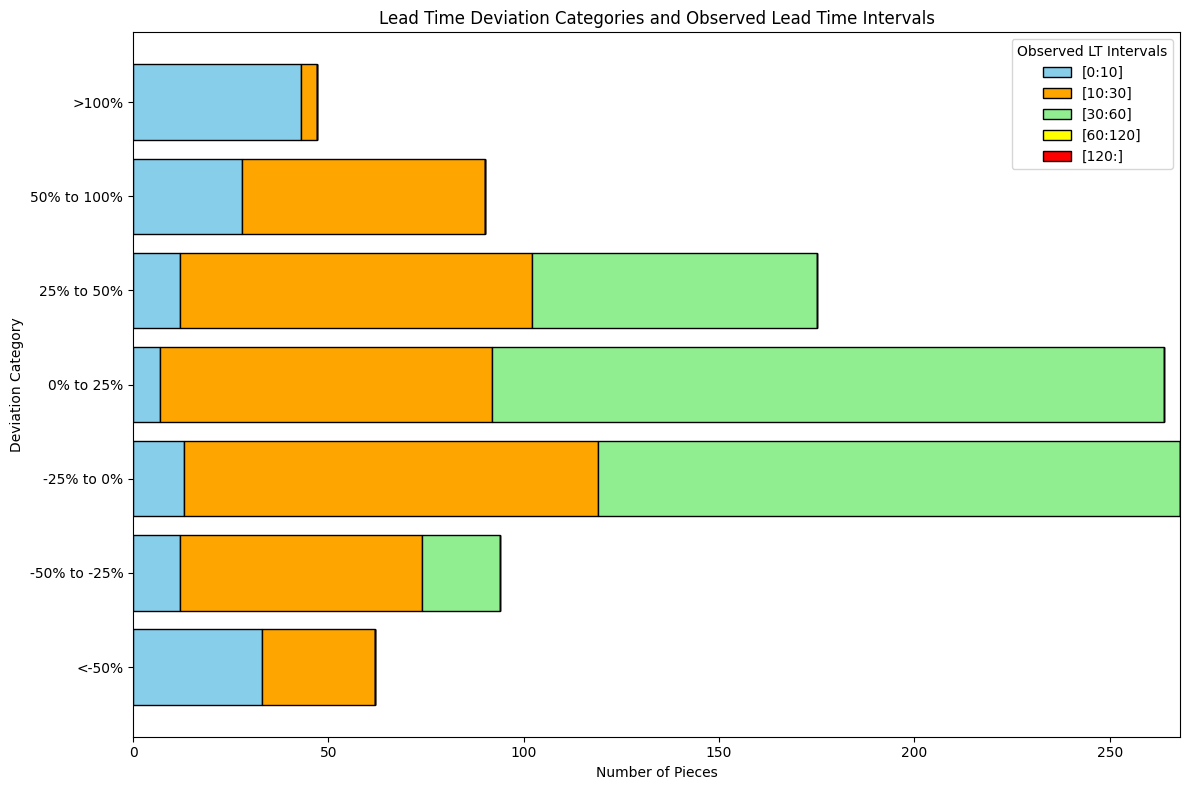

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Constants
num_pieces = 1000
observed_lt_min = 5
observed_lt_max = 50
random_lt_min = -10
random_lt_max = 15

# Generate data
np.random.seed(0)  # For reproducibility
observed_lt = np.random.randint(observed_lt_min, observed_lt_max, num_pieces)
theoretical_lt = observed_lt + np.random.randint(random_lt_min, random_lt_max, num_pieces)

# Calculate percentage deviation
percent_deviation = ((theoretical_lt - observed_lt) / observed_lt) * 100

# Categorize deviations
categories = ['<-50%', '-50% to -25%', '-25% to 0%', '0% to 25%', '25% to 50%', '50% to 100%', '>100%']
percent_bins = [-np.inf, -50, -25, 0, 25, 50, 100, np.inf]
deviation_categories = pd.cut(percent_deviation, bins=percent_bins, labels=categories)

# Categorize observed lead times
lt_intervals = ['[0:10]', '[10:30]', '[30:60]', '[60:120]', '[120:]']
lt_bins = [0, 10, 30, 60, 120, np.inf]
observed_lt_categories = pd.cut(observed_lt, bins=lt_bins, labels=lt_intervals)

# Create dataframe
df = pd.DataFrame({
    'Observed LT': observed_lt,
    'Theoretical LT': theoretical_lt,
    'Percent Deviation': percent_deviation,
    'Deviation Category': deviation_categories,
    'Observed LT Category': observed_lt_categories
})

# Count the number of pieces in each category
pivot_table = df.pivot_table(index='Deviation Category', columns='Observed LT Category', aggfunc='size', fill_value=0)

# Display the data (optional, use ace_tools if necessary)
#import ace_tools as tools
#tools.display_dataframe_to_user(name='Lead Time Deviation Data', dataframe=pivot_table)

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))

# Define colors for each lead time interval
colors = {
    '[0:10]': 'skyblue',
    '[10:30]': 'orange',
    '[30:60]': 'lightgreen',
    '[60:120]': 'yellow',
    '[120:]': 'red'
}

# Plot each interval as a stacked bar
bottom = np.zeros(len(pivot_table))
for interval in lt_intervals:
    values = pivot_table[interval].values if interval in pivot_table else [0] * len(pivot_table)
    ax.barh(pivot_table.index, values, left=bottom, color=colors[interval], edgecolor='black', label=interval)
    bottom += values

# Add labels and title
ax.set_xlabel('Number of Pieces')
ax.set_ylabel('Deviation Category')
ax.set_title('Lead Time Deviation Categories and Observed Lead Time Intervals')
ax.legend(title='Observed LT Intervals')

# Display plot
plt.tight_layout()
plt.show()
